<a href="https://colab.research.google.com/github/cheth-dev/Mainflow_internship/blob/main/TASK8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('/content/creditcard_2023.csv')
print("Initial Data:\n", df.head())

# === 3. Check for Missing Values ===
print("\nMissing Values:\n", df.isnull().sum())

# === 4. Feature Engineering ===
# Create additional features
df['Log_Amount'] = np.log1p(df['Amount'])
df['Is_Large_Transaction'] = (df['Amount'] > 10000).astype(int)

# Drop unnecessary columns
df.drop(['id'], axis=1, inplace=True)

# === 5. Prepare Features and Target ===
X = df.drop('Class', axis=1)
y = df['Class']

df.head()


Initial Data:
    id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V27       V

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount,Class,Log_Amount,Is_Large_Transaction
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0,9.797188,1
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0,8.784525,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0,7.829845,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0,8.591454,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0,9.566613,1


In [9]:
# === 6. Train/Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'max_depth': [5, 10, None],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'criterion': ['gini', 'entropy']
}

rand_search = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=10,  # Number of random combinations
    cv=3,
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

rand_search.fit(X_train, y_train)
best_model = rand_search.best_estimator_
print(rand_search.best_params_)

{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Precision: 0.9974514456454873
Recall: 0.9980127675289732
F1 Score: 0.9977320276376167


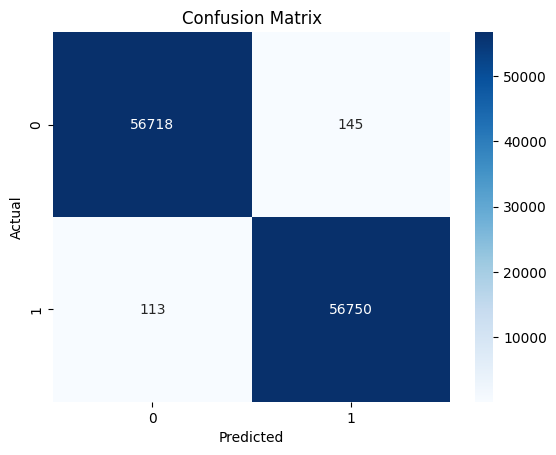


--- Recommendations ---
🔁 Use RandomForestClassifier or XGBoost for better performance.
⚖️ Apply class balancing techniques like SMOTE if fraud cases are heavily underrepresented.
📊 Track precision-recall curves and AUC scores for deeper insights.


In [10]:
# === 8. Model Evaluation ===
y_pred = best_model.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# === 9. Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# === 10. Recommendations ===
print("\n--- Recommendations ---")
print("🔁 Use RandomForestClassifier or XGBoost for better performance.")
print("⚖️ Apply class balancing techniques like SMOTE if fraud cases are heavily underrepresented.")
print("📊 Track precision-recall curves and AUC scores for deeper insights.")